Pandas 有一维的 series 和 二维的 DataFrame，pandas 建立在 NumPy 之上

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 一、创建对象

### 1、可以通过传递一个 list 对象来创建一个 Series，pandas 会默认创建整型索引：

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 2、通过传递一个 numpy array，时间索引以及列标签来创建一个DataFrame：

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,-0.410867,-1.708798,-1.615173,-0.515373
2013-01-02,1.410513,-1.792702,0.138129,0.298705
2013-01-03,1.423098,1.223220,1.312447,-0.167026
2013-01-04,-2.281395,-0.282169,0.277160,-0.159960
2013-01-05,-1.637620,-0.759267,-0.718093,0.152610
2013-01-06,0.220450,-0.219540,-0.922455,1.287864


### 3、通过传递一个能够被转换成类似序列结构的字典对象来创建一个 DataFrame：

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df3 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(3)),dtype='float32'),
                     'D' : np.array([3] * 3,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test"]),
                     'F' : 'foo' })

In [12]:
df3

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [13]:
df3.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 二、查看数据

### 1、查看DataFrame中头部和尾部的行：

In [14]:
df.head()

,A,B,C,D
2013-01-01,-0.410867,-1.708798,-1.615173,-0.515373
2013-01-02,1.410513,-1.792702,0.138129,0.298705
2013-01-03,1.423098,1.223220,1.312447,-0.167026
2013-01-04,-2.281395,-0.282169,0.277160,-0.159960
2013-01-05,-1.637620,-0.759267,-0.718093,0.152610


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,-2.281395,-0.282169,0.277160,-0.159960
2013-01-05,-1.637620,-0.759267,-0.718093,0.152610
2013-01-06,0.220450,-0.219540,-0.922455,1.287864


### 2、显示索引、列和底层的 numpy 数据：

In [17]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.values

array([[-0.41086718, -1.7087981 , -1.61517314, -0.51537302],
       [ 1.41051344, -1.792702  ,  0.13812875,  0.29870457],
       [ 1.42309816,  1.22321973,  1.31244734, -0.16702561],
       [-2.28139496, -0.28216933,  0.27716002, -0.15996004],
       [-1.63761979, -0.75926748, -0.71809267,  0.15261027],
       [ 0.22045029, -0.21953989, -0.92245511,  1.28786393]])

### 3、describe()函数对于数据的快速统计汇总：

In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.212637,-0.589876,-0.254664,0.149470
std,1.539314,1.117732,1.039679,0.625484
min,-2.281395,-1.792702,-1.615173,-0.515373
25%,-1.330932,-1.471415,-0.871364,-0.165259
50%,-0.095208,-0.520718,-0.289982,-0.003675
75%,1.112998,-0.235197,0.242402,0.262181
max,1.423098,1.223220,1.312447,1.287864


### 4、对数据的转置：

In [21]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.410867,1.410513,1.423098,-2.281395,-1.637620,0.220450
B,-1.708798,-1.792702,1.223220,-0.282169,-0.759267,-0.219540
C,-1.615173,0.138129,1.312447,0.277160,-0.718093,-0.922455
D,-0.515373,0.298705,-0.167026,-0.159960,0.152610,1.287864


### 5、按轴进行排序

In [23]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.515373,-1.615173,-1.708798,-0.410867
2013-01-02,0.298705,0.138129,-1.792702,1.410513
2013-01-03,-0.167026,1.312447,1.223220,1.423098
2013-01-04,-0.159960,0.277160,-0.282169,-2.281395
2013-01-05,0.152610,-0.718093,-0.759267,-1.637620
2013-01-06,1.287864,-0.922455,-0.219540,0.220450


### 6、按值进行排序

In [24]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,1.410513,-1.792702,0.138129,0.298705
2013-01-01,-0.410867,-1.708798,-1.615173,-0.515373
2013-01-05,-1.637620,-0.759267,-0.718093,0.152610
2013-01-04,-2.281395,-0.282169,0.277160,-0.159960
2013-01-06,0.220450,-0.219540,-0.922455,1.287864
2013-01-03,1.423098,1.223220,1.312447,-0.167026


# 三、 选择

虽然标准的 Python/Numpy 的选择和设置表达式都能够直接派上用场，但是作为工程使用的代码，我们推荐使用经过优化的 pandas 数据访问方式： .at, .iat, .loc, .iloc 和 .ix。

## 获取

### 1、选择一个单独的列，这将会返回一个 Series，等同于 df.A：

In [25]:
df['A']

2013-01-01   -0.410867
2013-01-02    1.410513
2013-01-03    1.423098
2013-01-04   -2.281395
2013-01-05   -1.637620
2013-01-06    0.220450
Freq: D, Name: A, dtype: float64

### 2、通过 [] 进行选择，这将会对行进行切片

In [26]:
df[0:3]

,A,B,C,D
2013-01-01,-0.410867,-1.708798,-1.615173,-0.515373
2013-01-02,1.410513,-1.792702,0.138129,0.298705
2013-01-03,1.423098,1.223220,1.312447,-0.167026


In [27]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.410513,-1.792702,0.138129,0.298705
2013-01-03,1.423098,1.223220,1.312447,-0.167026
2013-01-04,-2.281395,-0.282169,0.277160,-0.159960


## 通过标签选择

### 1、使用标签来获取一个交叉的区域

In [28]:
df.loc[dates[0]]

A   -0.410867
B   -1.708798
C   -1.615173
D   -0.515373
Name: 2013-01-01 00:00:00, dtype: float64

### 2、通过标签来在多个轴上进行选择

In [29]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.410867,-1.708798
2013-01-02,1.410513,-1.792702
2013-01-03,1.423098,1.223220
2013-01-04,-2.281395,-0.282169
2013-01-05,-1.637620,-0.759267
2013-01-06,0.220450,-0.219540


### 3、标签切片

In [30]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.410513,-1.792702
2013-01-03,1.423098,1.223220
2013-01-04,-2.281395,-0.282169


### 4、对于返回的对象进行维度缩减

In [31]:
df.loc['20130102',['A','B']]

A    1.410513
B   -1.792702
Name: 2013-01-02 00:00:00, dtype: float64

### 5、获取一个标量

In [32]:
df.loc[dates[0],'A']

-0.4108671750508565

### 6、快速访问一个标量（与上一个方法等价）

In [34]:
df.at[dates[0],'A']

-0.4108671750508565

## 通过位置选择

### 1、通过传递数值进行位置选择（选择的是行）

In [37]:
df.iloc[3]

A   -2.281395
B   -0.282169
C    0.277160
D   -0.159960
Name: 2013-01-04 00:00:00, dtype: float64

### 2、通过数值进行切片，与 numpy/python 中的情况类似

In [38]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-2.281395,-0.282169
2013-01-05,-1.637620,-0.759267


### 3、通过指定一个位置的列表，与 numpy/python 中的情况类似

In [39]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.410513,0.138129
2013-01-03,1.423098,1.312447
2013-01-05,-1.637620,-0.718093


### 4、对行进行切片

In [40]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.410513,-1.792702,0.138129,0.298705
2013-01-03,1.423098,1.223220,1.312447,-0.167026


### 5、对列进行切片

In [41]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.708798,-1.615173
2013-01-02,-1.792702,0.138129
2013-01-03,1.223220,1.312447
2013-01-04,-0.282169,0.277160
2013-01-05,-0.759267,-0.718093
2013-01-06,-0.219540,-0.922455


### 6、获取特定的值

In [42]:
df.iloc[1,1]

-1.7927019975667455

快速访问标量（等同于前一个方法）：

In [43]:
df.iat[1,1]

-1.7927019975667455

## 布尔索引

### 1、使用一个单独列的值来选择数据：

In [44]:
df[df.A > 0]

,A,B,C,D
2013-01-02,1.410513,-1.792702,0.138129,0.298705
2013-01-03,1.423098,1.223220,1.312447,-0.167026
2013-01-06,0.220450,-0.219540,-0.922455,1.287864


### 2、使用 where 操作来选择数据：

In [45]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,1.410513,NaN,0.138129,0.298705
2013-01-03,1.423098,1.22322,1.312447,NaN
2013-01-04,NaN,NaN,0.277160,NaN
2013-01-05,NaN,NaN,NaN,0.152610
2013-01-06,0.220450,NaN,NaN,1.287864


### 3、使用 isin() 方法来过滤：

In [46]:
df2 = df.copy()

In [47]:
df2['E'] = ['one', 'one','two','three','four','three']

In [48]:
df2

,A,B,C,D,E
2013-01-01,-0.410867,-1.708798,-1.615173,-0.515373,one
2013-01-02,1.410513,-1.792702,0.138129,0.298705,one
2013-01-03,1.423098,1.223220,1.312447,-0.167026,two
2013-01-04,-2.281395,-0.282169,0.277160,-0.159960,three
2013-01-05,-1.637620,-0.759267,-0.718093,0.152610,four
2013-01-06,0.220450,-0.219540,-0.922455,1.287864,three


In [49]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,1.423098,1.223220,1.312447,-0.167026,two
2013-01-05,-1.637620,-0.759267,-0.718093,0.152610,four


## 设置

### 1、设置一个新的列：

In [50]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

In [51]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [53]:
df['F'] = s1

In [54]:
df

,A,B,C,D,F
2013-01-01,-0.410867,-1.708798,-1.615173,-0.515373,NaN
2013-01-02,1.410513,-1.792702,0.138129,0.298705,1.0
2013-01-03,1.423098,1.223220,1.312447,-0.167026,2.0
2013-01-04,-2.281395,-0.282169,0.277160,-0.159960,3.0
2013-01-05,-1.637620,-0.759267,-0.718093,0.152610,4.0
2013-01-06,0.220450,-0.219540,-0.922455,1.287864,5.0


### 2、通过标签设置新的值：

In [55]:
df.at[dates[0],'A'] = 0

In [56]:
df

,A,B,C,D,F
2013-01-01,0.000000,-1.708798,-1.615173,-0.515373,NaN
2013-01-02,1.410513,-1.792702,0.138129,0.298705,1.0
2013-01-03,1.423098,1.223220,1.312447,-0.167026,2.0
2013-01-04,-2.281395,-0.282169,0.277160,-0.159960,3.0
2013-01-05,-1.637620,-0.759267,-0.718093,0.152610,4.0
2013-01-06,0.220450,-0.219540,-0.922455,1.287864,5.0


### 3、通过位置设置新的值：

In [57]:
df.iat[0,1] = 0

In [58]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.615173,-0.515373,NaN
2013-01-02,1.410513,-1.792702,0.138129,0.298705,1.0
2013-01-03,1.423098,1.223220,1.312447,-0.167026,2.0
2013-01-04,-2.281395,-0.282169,0.277160,-0.159960,3.0
2013-01-05,-1.637620,-0.759267,-0.718093,0.152610,4.0
2013-01-06,0.220450,-0.219540,-0.922455,1.287864,5.0


### 4、通过一个 numpy 数组设置一组新值：

In [59]:
df.loc[:,'D'] = np.array([5] * len(df))

In [60]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.615173,5,NaN
2013-01-02,1.410513,-1.792702,0.138129,5,1.0
2013-01-03,1.423098,1.223220,1.312447,5,2.0
2013-01-04,-2.281395,-0.282169,0.277160,5,3.0
2013-01-05,-1.637620,-0.759267,-0.718093,5,4.0
2013-01-06,0.220450,-0.219540,-0.922455,5,5.0


### 5、通过 where 操作来设置新的值：

In [61]:
df2 = df.copy()

In [62]:
df2[df2 > 0] = -df2

In [63]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.615173,-5,NaN
2013-01-02,-1.410513,-1.792702,-0.138129,-5,-1.0
2013-01-03,-1.423098,-1.223220,-1.312447,-5,-2.0
2013-01-04,-2.281395,-0.282169,-0.277160,-5,-3.0
2013-01-05,-1.637620,-0.759267,-0.718093,-5,-4.0
2013-01-06,-0.220450,-0.219540,-0.922455,-5,-5.0


# 四、缺失值处理

在 pandas 中，使用 np.nan 来代替缺失值，这些值将默认不会包含在计算中

### 1、reindex() 方法可以对指定轴上的索引进行改变/增加/删除操作，这将返回原始数据的一个拷贝：

In [64]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [65]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.615173,5,NaN,NaN
2013-01-02,1.410513,-1.792702,0.138129,5,1.0,NaN
2013-01-03,1.423098,1.223220,1.312447,5,2.0,NaN
2013-01-04,-2.281395,-0.282169,0.277160,5,3.0,NaN


In [66]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [67]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.615173,5,NaN,1.0
2013-01-02,1.410513,-1.792702,0.138129,5,1.0,1.0
2013-01-03,1.423098,1.223220,1.312447,5,2.0,NaN
2013-01-04,-2.281395,-0.282169,0.277160,5,3.0,NaN


### 2、去掉包含缺失值的行：

In [68]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.410513,-1.792702,0.138129,5,1.0,1.0


### 3、对缺失值进行填充：

In [69]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.615173,5,5.0,1.0
2013-01-02,1.410513,-1.792702,0.138129,5,1.0,1.0
2013-01-03,1.423098,1.223220,1.312447,5,2.0,5.0
2013-01-04,-2.281395,-0.282169,0.277160,5,3.0,5.0


### 4、对数据进行布尔填充：

In [70]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 五、相关操作

## 统计（相关操作通常情况下不包括缺失值）

### 1、执行描述性统计：

In [72]:
df.mean()

A   -0.144159
B   -0.305076
C   -0.254664
D    5.000000
F    3.000000
dtype: float64

In [73]:
df.mean(1)

2013-01-01    0.846207
2013-01-02    1.151188
2013-01-03    2.191753
2013-01-04    1.142719
2013-01-05    1.177004
2013-01-06    1.815691
Freq: D, dtype: float64

In [74]:
df.mean(0)

A   -0.144159
B   -0.305076
C   -0.254664
D    5.000000
F    3.000000
dtype: float64

### 3、对于拥有不同维度，需要对齐的对象进行操作。Pandas 会自动的沿着指定的维度进行广播：

In [75]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [76]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [78]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.615173,5,NaN
2013-01-02,1.410513,-1.792702,0.138129,5,1.0
2013-01-03,1.423098,1.223220,1.312447,5,2.0
2013-01-04,-2.281395,-0.282169,0.277160,5,3.0
2013-01-05,-1.637620,-0.759267,-0.718093,5,4.0
2013-01-06,0.220450,-0.219540,-0.922455,5,5.0


In [77]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.423098,0.223220,0.312447,4.0,1.0
2013-01-04,-5.281395,-3.282169,-2.722840,2.0,0.0
2013-01-05,-6.637620,-5.759267,-5.718093,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

### 1、对数据应用函数：

In [79]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.615173,5,NaN
2013-01-02,1.410513,-1.792702,-1.477044,10,1.0
2013-01-03,2.833612,-0.569482,-0.164597,15,3.0
2013-01-04,0.552217,-0.851652,0.112563,20,6.0
2013-01-05,-1.085403,-1.610919,-0.605530,25,10.0
2013-01-06,-0.864953,-1.830459,-1.527985,30,15.0


In [80]:
df.apply(lambda x: x.max() - x.min())

A    3.704493
B    3.015922
C    2.927620
D    0.000000
F    4.000000
dtype: float64

## 直方图

In [81]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [82]:
s

0    2
1    0
2    0
3    0
4    3
5    4
6    3
7    0
8    5
9    5
dtype: int32

In [83]:
s.value_counts()

0    4
5    2
3    2
4    1
2    1
dtype: int64

## 字符串方法

Series 对象在其 str 属性中配备了一组字符串处理方法，可以很容易的应用到数组中的每个元素，如下段代码所示。

In [84]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [85]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [86]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 六、合并

Pandas 提供了大量的方法能够轻松的对 Series，DataFrame 和 Panel 对象进行各种符合各种逻辑关系的合并操作。

### Concat

In [88]:
df = pd.DataFrame(np.random.randn(10, 4))

In [89]:
df

,0,1,2,3
0,0.354165,-0.008814,0.733781,-0.453064
1,1.848876,-0.163753,0.452905,-0.421803
2,0.381304,-0.901096,-0.853734,0.916402
3,0.784628,-0.230213,1.313604,-1.254329
4,-0.232829,0.090897,1.820597,-0.949810
5,-1.314850,-0.821999,-0.234552,-0.513996
6,-1.181031,1.126706,-0.374044,0.471504
7,0.219674,-0.247505,0.998656,0.166462
8,-0.866148,0.615571,0.912035,0.457373
9,0.380910,0.940514,0.460241,-0.686017


In [90]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [91]:
pieces

[          0         1         2         3
 0  0.354165 -0.008814  0.733781 -0.453064
 1  1.848876 -0.163753  0.452905 -0.421803
 2  0.381304 -0.901096 -0.853734  0.916402,
           0         1         2         3
 3  0.784628 -0.230213  1.313604 -1.254329
 4 -0.232829  0.090897  1.820597 -0.949810
 5 -1.314850 -0.821999 -0.234552 -0.513996
 6 -1.181031  1.126706 -0.374044  0.471504,
           0         1         2         3
 7  0.219674 -0.247505  0.998656  0.166462
 8 -0.866148  0.615571  0.912035  0.457373
 9  0.380910  0.940514  0.460241 -0.686017]

In [94]:
pd.concat(pieces)

,0,1,2,3
0,0.354165,-0.008814,0.733781,-0.453064
1,1.848876,-0.163753,0.452905,-0.421803
2,0.381304,-0.901096,-0.853734,0.916402
3,0.784628,-0.230213,1.313604,-1.254329
4,-0.232829,0.090897,1.820597,-0.949810
5,-1.314850,-0.821999,-0.234552,-0.513996
6,-1.181031,1.126706,-0.374044,0.471504
7,0.219674,-0.247505,0.998656,0.166462
8,-0.866148,0.615571,0.912035,0.457373
9,0.380910,0.940514,0.460241,-0.686017


### Join

类似于 SQL 类型的合并

In [96]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [97]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [98]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [99]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [100]:
df

,A,B,C,D
0,-0.921118,1.126643,1.437947,-1.790751
1,1.284825,0.703691,0.114172,0.169960
2,1.571930,-0.791696,-1.251830,-1.334130
3,-1.497061,1.361837,0.366114,-0.954427
4,-0.566743,0.492153,0.875391,0.820195
5,-0.492675,0.045036,-0.032908,0.553093
6,0.932952,-0.549686,-0.360105,1.404007
7,0.448482,0.238216,0.881979,-0.634788


In [101]:
s = df.iloc[3]

In [102]:
s

A   -1.497061
B    1.361837
C    0.366114
D   -0.954427
Name: 3, dtype: float64

In [103]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.921118,1.126643,1.437947,-1.790751
1,1.284825,0.703691,0.114172,0.169960
2,1.571930,-0.791696,-1.251830,-1.334130
3,-1.497061,1.361837,0.366114,-0.954427
4,-0.566743,0.492153,0.875391,0.820195
5,-0.492675,0.045036,-0.032908,0.553093
6,0.932952,-0.549686,-0.360105,1.404007
7,0.448482,0.238216,0.881979,-0.634788
8,-1.497061,1.361837,0.366114,-0.954427


# 七、分组

对于”group by”操作，我们通常是指以下一个或多个操作步骤：

- （Splitting）按照一些规则将数据分为不同的组；

- （Applying）对于每组数据分别执行一个函数；

- （Combining）将结果组合到一个数据结构中；

In [104]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [105]:
df

,A,B,C,D
0,foo,one,-0.284810,0.624008
1,bar,one,-0.395717,1.292506
2,foo,two,0.276931,0.523902
3,bar,three,2.452649,-1.155500
4,foo,two,0.449557,-2.295640
5,bar,two,-0.131355,-0.076522
6,foo,one,1.576384,-0.305615
7,foo,three,-0.756966,-0.623484


### 1、分组并对每个分组执行 sum 函数：

In [106]:
df.groupby('A').sum()

,C,D
A,,
bar,1.925577,0.060485
foo,1.261096,-2.076828


### 2、通过多个列进行分组形成一个层次索引，然后执行函数：

In [107]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.395717  1.292506
    three  2.452649 -1.155500
    two   -0.131355 -0.076522
foo one    1.291574  0.318394
    three -0.756966 -0.623484
    two    0.726488 -1.771739

# 八、改变形状

### Stack

In [108]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [109]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [110]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [111]:
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [112]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [113]:
df

A         B
first second                    
bar   one    -0.018525 -0.526686
      two    -1.023428 -1.913928
baz   one    -0.340619  0.231075
      two     0.975142  0.963956
foo   one    -0.258685 -2.762379
      two     1.463664  0.214374
qux   one    -0.729173 -0.681564
      two    -1.000644 -1.462929

In [114]:
df2 = df[:4]

In [115]:
stacked = df2.stack()

In [116]:
stacked

first  second   
bar    one     A   -0.018525
               B   -0.526686
       two     A   -1.023428
               B   -1.913928
baz    one     A   -0.340619
               B    0.231075
       two     A    0.975142
               B    0.963956
dtype: float64

In [117]:
stacked.unstack()

A         B
first second                    
bar   one    -0.018525 -0.526686
      two    -1.023428 -1.913928
baz   one    -0.340619  0.231075
      two     0.975142  0.963956

In [118]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.018525 -1.023428
      B -0.526686 -1.913928
baz   A -0.340619  0.975142
      B  0.231075  0.963956

In [119]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.018525 -0.340619
       B -0.526686  0.231075
two    A -1.023428  0.975142
       B -1.913928  0.963956

# 九、时间序列

Pandas 在对频率转换进行重新采样时拥有简单、强大且高效的功能（如将按秒采样的数据转换为按5分钟为单位进行采样的数据）

In [120]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [121]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [122]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [123]:
ts

2012-01-01 00:00:00     89
2012-01-01 00:00:01     93
2012-01-01 00:00:02    427
2012-01-01 00:00:03     11
2012-01-01 00:00:04      5
2012-01-01 00:00:05    105
2012-01-01 00:00:06    234
2012-01-01 00:00:07    395
2012-01-01 00:00:08    449
2012-01-01 00:00:09    331
2012-01-01 00:00:10    248
2012-01-01 00:00:11    431
2012-01-01 00:00:12    257
2012-01-01 00:00:13    327
2012-01-01 00:00:14    317
2012-01-01 00:00:15    155
2012-01-01 00:00:16    161
2012-01-01 00:00:17     75
2012-01-01 00:00:18    317
2012-01-01 00:00:19    310
2012-01-01 00:00:20    483
2012-01-01 00:00:21    104
2012-01-01 00:00:22    274
2012-01-01 00:00:23    246
2012-01-01 00:00:24    485
2012-01-01 00:00:25    351
2012-01-01 00:00:26    274
2012-01-01 00:00:27     46
2012-01-01 00:00:28    225
2012-01-01 00:00:29    475
                      ... 
2012-01-01 00:01:10    122
2012-01-01 00:01:11    440
2012-01-01 00:01:12    454
2012-01-01 00:01:13    270
2012-01-01 00:01:14    182
2012-01-01 00:01:15    219
2

In [125]:
 ts.resample('1Min').sum()

2012-01-01 00:00:00    14671
2012-01-01 00:01:00    10954
Freq: T, dtype: int32

In [126]:
 ts.resample('5Min').sum()

2012-01-01    25625
Freq: 5T, dtype: int32

### 1、时区表示：

In [127]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [128]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [129]:
ts

2012-03-06   -0.422974
2012-03-07    1.241056
2012-03-08   -2.572175
2012-03-09    1.324349
2012-03-10    0.097666
Freq: D, dtype: float64

In [130]:
ts_utc = ts.tz_localize('UTC')

In [131]:
ts_utc

2012-03-06 00:00:00+00:00   -0.422974
2012-03-07 00:00:00+00:00    1.241056
2012-03-08 00:00:00+00:00   -2.572175
2012-03-09 00:00:00+00:00    1.324349
2012-03-10 00:00:00+00:00    0.097666
Freq: D, dtype: float64

### 2、时区转换：

In [132]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.422974
2012-03-06 19:00:00-05:00    1.241056
2012-03-07 19:00:00-05:00   -2.572175
2012-03-08 19:00:00-05:00    1.324349
2012-03-09 19:00:00-05:00    0.097666
Freq: D, dtype: float64

### 3、时间跨度转换：

In [134]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [135]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [136]:
ts

2012-01-31    1.300475
2012-02-29    0.180956
2012-03-31    0.678830
2012-04-30   -1.339388
2012-05-31    0.592763
Freq: M, dtype: float64

In [137]:
ps = ts.to_period()

In [138]:
ps

2012-01    1.300475
2012-02    0.180956
2012-03    0.678830
2012-04   -1.339388
2012-05    0.592763
Freq: M, dtype: float64

In [139]:
ps.to_timestamp()

2012-01-01    1.300475
2012-02-01    0.180956
2012-03-01    0.678830
2012-04-01   -1.339388
2012-05-01    0.592763
Freq: MS, dtype: float64

### 4、时期和时间戳之间的转换使得可以使用一些方便的算术函数。

In [140]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [141]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [142]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [143]:
ts

1990-03-01 09:00    0.648778
1990-06-01 09:00   -2.619921
1990-09-01 09:00    0.289716
1990-12-01 09:00   -0.603262
1991-03-01 09:00    0.070389
1991-06-01 09:00    1.336782
1991-09-01 09:00   -0.296134
1991-12-01 09:00   -0.585416
1992-03-01 09:00   -0.200629
1992-06-01 09:00   -1.895324
1992-09-01 09:00   -0.289074
1992-12-01 09:00    0.275693
1993-03-01 09:00    0.528130
1993-06-01 09:00    0.203179
1993-09-01 09:00   -2.063996
1993-12-01 09:00    1.080365
1994-03-01 09:00    0.453847
1994-06-01 09:00    0.911996
1994-09-01 09:00    0.133796
1994-12-01 09:00   -0.464830
1995-03-01 09:00    1.452947
1995-06-01 09:00   -1.501977
1995-09-01 09:00    0.950149
1995-12-01 09:00   -0.126028
1996-03-01 09:00    0.979170
1996-06-01 09:00   -0.666519
1996-09-01 09:00   -0.013840
1996-12-01 09:00    0.163807
1997-03-01 09:00   -0.380298
1997-06-01 09:00   -1.018835
1997-09-01 09:00    1.163891
1997-12-01 09:00   -0.504042
1998-03-01 09:00    0.035072
1998-06-01 09:00   -0.412846
1998-09-01 09:

In [144]:
ts.head()

1990-03-01 09:00    0.648778
1990-06-01 09:00   -2.619921
1990-09-01 09:00    0.289716
1990-12-01 09:00   -0.603262
1991-03-01 09:00    0.070389
Freq: H, dtype: float64

# 十、Categorical

In [145]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [146]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


### 1、将原始的 grade 转换为 Categorical 数据类型：

In [148]:
df["grade"] = df["raw_grade"].astype("category")

In [149]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

### 2、将 Categorical 类型数据重命名为更有意义的名称：

In [151]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [152]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


### 3、对类别进行重新排序，增加缺失的类别

In [153]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [154]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


### 4、排序是按照 Categorical 的顺序进行的而不是按照字典顺序进行：

In [155]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


### 5、对 Categorical 列进行排序时存在空的类别：

In [157]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# 十一、画图

In [158]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [159]:
ts = ts.cumsum()

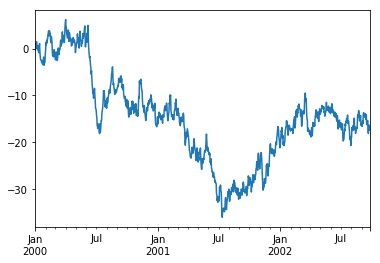

In [162]:
%matplotlib inline
ts.plot()

对于 DataFrame 来说，plot 是一种将所有列及其标签进行绘制的简便方法：

In [163]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [164]:
df = df.cumsum()

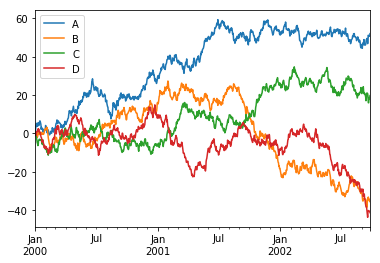

In [167]:
plt.figure();
df.plot();
plt.legend(loc='best')

# 十二、导入和保存数据

## CSV

### 1、写入 csv 文件：

In [169]:
df.to_csv('foo.csv')

### 2、从 csv 文件中读取：

In [170]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.258459,0.569245,0.245455,0.156115
1,2000-01-02,1.417770,0.499173,0.351623,0.119811
2,2000-01-03,3.999900,0.517858,0.009719,-0.702911
3,2000-01-04,4.300965,-0.001734,-1.610564,-1.082234
4,2000-01-05,5.176365,0.442191,-2.295261,0.576618
5,2000-01-06,3.550157,-2.203630,-3.783261,0.537974
6,2000-01-07,4.738730,-1.298530,-4.874565,1.128945
7,2000-01-08,3.975856,-1.758023,-5.339966,1.154039
8,2000-01-09,4.345436,-0.869414,-6.415889,2.221773
9,2000-01-10,5.561570,0.010322,-6.219451,1.108943


## Excel

### 1、写入 excel 文件：

In [173]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

### 2、从 excel 文件中读取：

In [175]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.258459,0.569245,0.245455,0.156115
2000-01-02,1.417770,0.499173,0.351623,0.119811
2000-01-03,3.999900,0.517858,0.009719,-0.702911
2000-01-04,4.300965,-0.001734,-1.610564,-1.082234
2000-01-05,5.176365,0.442191,-2.295261,0.576618
2000-01-06,3.550157,-2.203630,-3.783261,0.537974
2000-01-07,4.738730,-1.298530,-4.874565,1.128945
2000-01-08,3.975856,-1.758023,-5.339966,1.154039
2000-01-09,4.345436,-0.869414,-6.415889,2.221773
2000-01-10,5.561570,0.010322,-6.219451,1.108943


## dataFrame 转为 numpy

In [ ]:
df.values
df.as_matrix()
np.array(df)

## numpy 转换为 list

In [ ]:
list = np.tolist()

### 稀疏矩阵与数组互转

In [ ]:
# to_csr 是按行压缩的稀疏矩阵，按行切片比较快，可以按列切片
# to_csc 是按列压缩的稀疏矩阵，按列切片比较快，可以按行切片
sparse_matrix = scipy.sparse.csr_matrix(df.values)

# 稀疏矩阵转 np 数组
sparse_matrix.todense()